<a href="https://colab.research.google.com/github/imabari/rakuten_tools/blob/main/ehime_rakuten_menseki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2021/N03-20210101_38_GML.zip

--2021-12-20 02:46:31--  https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2021/N03-20210101_38_GML.zip
Resolving nlftp.mlit.go.jp (nlftp.mlit.go.jp)... 192.29.39.48, 192.29.43.211, 192.29.41.65
Connecting to nlftp.mlit.go.jp (nlftp.mlit.go.jp)|192.29.39.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14550007 (14M) [application/zip]
Saving to: ‘N03-20210101_38_GML.zip’

N03-20210101_38_GML 100%[===================>]  13.88M  23.4MB/s    in 0.6s    

2021-12-20 02:46:32 (23.4 MB/s) - ‘N03-20210101_38_GML.zip’ saved [14550007/14550007]



In [2]:
!pip install geopandas
!pip install rtree
!pip install pygeos

     |████████████████████████████████| 1.0 MB 3.8 MB/s 
     |████████████████████████████████| 6.3 MB 39.2 MB/s 
     |████████████████████████████████| 15.4 MB 30.4 MB/s 
     |████████████████████████████████| 994 kB 4.1 MB/s 
     |████████████████████████████████| 2.1 MB 4.7 MB/s 


In [3]:
import pandas as pd
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# 市区町村で結合

https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html

In [4]:
temp = gpd.read_file("N03-20210101_38_GML.zip!N03-20210101_38_GML").rename(columns={"N03_001": "都道府県名", "N03_004": "市区町村名", "N03_007": "SHICODE"})
ehime = temp.dropna(subset=["SHICODE"]).dissolve(by="SHICODE")
ehime

,geometry,都道府県名,N03_002,N03_003,市区町村名
SHICODE,,,,,
38201,"MULTIPOLYGON (((132.52996 33.84425, 132.53000 ...",愛媛県,None,None,松山市
38202,"MULTIPOLYGON (((132.81523 34.02308, 132.81519 ...",愛媛県,None,None,今治市
38203,"MULTIPOLYGON (((132.26563 33.16799, 132.26564 ...",愛媛県,None,None,宇和島市
38204,"MULTIPOLYGON (((132.35818 33.36854, 132.35820 ...",愛媛県,None,None,八幡浜市
38205,"MULTIPOLYGON (((133.32149 33.99421, 133.32151 ...",愛媛県,None,None,新居浜市
38206,"MULTIPOLYGON (((133.10450 33.95198, 133.10450 ...",愛媛県,None,None,西条市
38207,"MULTIPOLYGON (((132.42617 33.55354, 132.42614 ...",愛媛県,None,None,大洲市
38210,"MULTIPOLYGON (((132.58131 33.65392, 132.58120 ...",愛媛県,None,None,伊予市
38213,"MULTIPOLYGON (((133.59910 34.04237, 133.59914 ...",愛媛県,None,None,四国中央市


In [5]:
ehime.crs

<Geographic 2D CRS: EPSG:6668>
Name: JGD2011
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

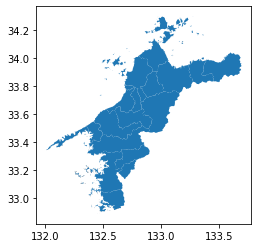

In [6]:
ehime.plot()

# 基地局データ

In [7]:
# スプレッドシートのURL
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRE1NoYtNw1FmjRQ8wcdPkcE0Ryeoc2mfFkCQPHjzwL5CpwNKkLXnBl_F7c0LZjrtbLtRLH55ZVi6gQ/pub?gid=0&single=true&output=csv"

In [8]:
df0 = pd.read_csv(csv_url, index_col=0).dropna(how="all").rename(columns={"緯度":"lat", "経度": "lng"})

In [9]:
pt_df = gpd.GeoDataFrame(df0, geometry = gpd.points_from_xy(df0.lng, df0.lat), crs="EPSG:6668")

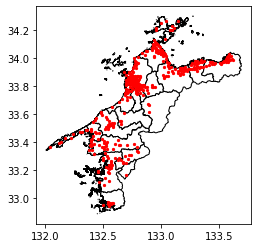

In [10]:
base = ehime.plot(color="white", edgecolor="black")
pt_df.plot(ax=base, marker="o", color="red", markersize=5)

# 平面直角座標系

https://www.gsi.go.jp/sokuchikijun/jpc.html

https://homata.gitbook.io/geodjango/hajimeteno/coordinate

In [11]:
ehime.to_crs(epsg=6672, inplace=True)
ehime.crs

<Projected CRS: EPSG:6672>
Name: JGD2011 / Japan Plane Rectangular CS IV
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - onshore - Shikoku - Kagawa-ken; Ehime-ken; Tokushima-ken; Kochi-ken.
- bounds: (131.95, 32.69, 134.81, 34.45)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone IV
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
pt_df.to_crs(epsg=6672, inplace=True)
pt_df.crs

<Projected CRS: EPSG:6672>
Name: JGD2011 / Japan Plane Rectangular CS IV
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - onshore - Shikoku - Kagawa-ken; Ehime-ken; Tokushima-ken; Kochi-ken.
- bounds: (131.95, 32.69, 134.81, 34.45)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone IV
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
pt_df

,場所,場所補足,設置タイプ,市区町村,説明,情報提供,状況,sector,sub6,ミリ波,eNB-LCID,PCI,lat,lng,geometry
番号,,,,,,,,,,,,,,,
1,今治市立花町2丁目,NaN,NaN,今治市,NaN,@seaki,open,3.0,3,3,"737335-1,2,3","39,347,139",34.052319,132.999271,POINT (-46226.959 116818.210)
2,今治市中寺①,今治中寺郵便局付近,NaN,今治市,NaN,@seaki,open,3.0,3,3,"737331-1,2,3","292,98,300",34.037485,132.991341,POINT (-46967.236 115176.527)
3,今治市桜井4丁目,志島ヶ原・綱敷天満神社付近,NaN,今治市,NaN,@seaki,open,3.0,-,-,"737342-7,8,9","239,168,349",34.017402,133.041459,POINT (-42349.507 112927.195)
4,今治市登畑,レデイ薬局今治国分店付近,NaN,今治市,NaN,@seaki,open,3.0,-,-,"737352-10,11,12","136,137,135",34.019522,133.016295,POINT (-44672.490 113173.022)
5,今治市阿方①,ファミリーマート今治阿方店付近,NaN,今治市,NaN,@seaki,open,3.0,-,-,"737354-4,5,6","225,227,226",34.061198,132.970841,POINT (-48846.568 117816.259)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,南宇和郡愛南町御荘平城①,ローソン愛南町御荘平城店,NaN,愛南町,NaN,@kmtt2012,close,3.0,-,-,NaN,NaN,32.965683,132.550687,POINT (-88743.474 -3405.457)
411,南宇和郡愛南町御荘平城②,長州園地,NaN,愛南町,NaN,@kmtt2012,close,3.0,-,-,NaN,NaN,32.968995,132.544405,POINT (-89327.415 -3032.846)
412,南宇和郡愛南町城辺甲沖,NaN,NaN,愛南町,NaN,@amegokun,close,NaN,NaN,NaN,NaN,NaN,32.960264,132.575333,POINT (-86444.716 -4026.921)


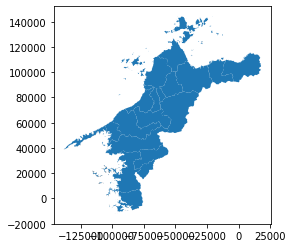

In [14]:
ehime.plot()

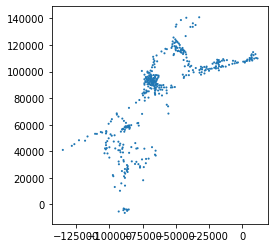

In [15]:
pt_df.geometry.buffer(780).plot()

In [16]:
# TA10 = 780
circles = pt_df.geometry.buffer(780)
circles

番号
1      POLYGON ((-45446.959 116818.210, -45450.715 11...
2      POLYGON ((-46187.236 115176.527, -46190.992 11...
3      POLYGON ((-41569.507 112927.195, -41573.263 11...
4      POLYGON ((-43892.490 113173.022, -43896.246 11...
5      POLYGON ((-48066.568 117816.259, -48070.324 11...
                             ...                        
410    POLYGON ((-87963.474 -3405.457, -87967.230 -34...
411    POLYGON ((-88547.415 -3032.846, -88551.171 -31...
412    POLYGON ((-85664.716 -4026.921, -85668.472 -41...
413    POLYGON ((-85933.868 -4798.686, -85937.624 -48...
414    POLYGON ((-92291.537 -5281.323, -92295.293 -53...
Length: 414, dtype: geometry

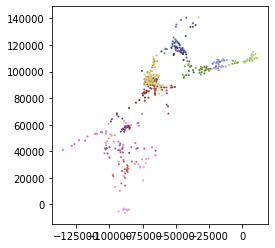

In [17]:
circles.plot(cmap="tab20b")

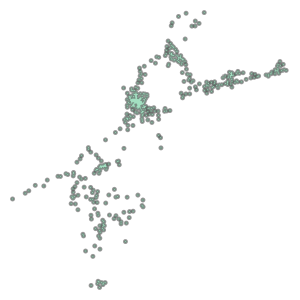

In [18]:
mp = circles.unary_union
mp

In [19]:
ehime_map = ehime["geometry"].difference(mp)

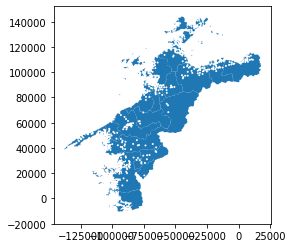

In [20]:
ehime_map.plot()

In [21]:
ehime.area

SHICODE
38201    4.293135e+08
38202    4.191514e+08
38203    4.681898e+08
38204    1.326513e+08
38205    2.344197e+08
38206    5.099529e+08
38207    4.321092e+08
38210    1.944291e+08
38213    4.211565e+08
38214    5.143257e+08
38215    2.112761e+08
38356    3.037232e+07
38386    5.836076e+08
38401    2.040547e+07
38402    1.015784e+08
38422    2.994079e+08
38442    9.398961e+07
38484    9.844693e+07
38488    2.418643e+08
38506    2.389865e+08
dtype: float64

In [22]:
ehime_map.area

SHICODE
38201    3.000435e+08
38202    3.392162e+08
38203    4.268992e+08
38204    1.137112e+08
38205    1.925405e+08
38206    4.516807e+08
38207    3.942617e+08
38210    1.709586e+08
38213    3.768120e+08
38214    4.711917e+08
38215    1.917377e+08
38356    2.846405e+07
38386    5.778828e+08
38401    1.481761e+07
38402    9.320105e+07
38422    2.928090e+08
38442    8.041282e+07
38484    9.647144e+07
38488    2.220982e+08
38506    2.274896e+08
dtype: float64

In [23]:
df1 = pd.concat([ehime["市区町村名"], ehime.area.round(3), ehime_map.area.round(3)], axis=1)

In [24]:
df1.set_axis(["市区町村", "面積", "カバー外"], axis=1, inplace=True)

In [25]:
df1["カバー内"] = df1["面積"] - df1["カバー外"]

In [29]:
df1["カバー率"] = df1["カバー内"] / df1["面積"] * 100

In [27]:
df1.set_index("市区町村", drop=True, inplace=True)

In [30]:
df1

,面積,カバー外,カバー内,カバー率
市区町村,,,,
松山市,4.293135e+08,3.000435e+08,1.292700e+08,30.110855
今治市,4.191514e+08,3.392162e+08,7.993521e+07,19.070722
宇和島市,4.681898e+08,4.268992e+08,4.129062e+07,8.819205
八幡浜市,1.326513e+08,1.137112e+08,1.894018e+07,14.278168
新居浜市,2.344197e+08,1.925405e+08,4.187920e+07,17.865048
西条市,5.099529e+08,4.516807e+08,5.827222e+07,11.426980
大洲市,4.321092e+08,3.942617e+08,3.784743e+07,8.758766
伊予市,1.944291e+08,1.709586e+08,2.347054e+07,12.071514
四国中央市,4.211565e+08,3.768120e+08,4.434459e+07,10.529241
